# Importação de bibliotecas

In [1]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import cosine_similarity
import statsmodels.api as sm

# Leitura e coleta de dados 

In [2]:
#Leitura e coleta de dados
df = pd.read_csv('dataset.csv')

In [3]:
#Visualização da base de dados
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [4]:
#Contagem de linhas da base de dados
df.count()

Year                                  3065
Month                                 3065
Sector                                3065
Hydroelectric Power                   3065
Geothermal Energy                     3065
Solar Energy                          3065
Wind Energy                           3065
Wood Energy                           3065
Waste Energy                          3065
Fuel Ethanol, Excluding Denaturant    3065
Biomass Losses and Co-products        3065
Biomass Energy                        3065
Total Renewable Energy                3065
Renewable Diesel Fuel                 3065
Other Biofuels                        3065
Conventional Hydroelectric Power      3065
Biodiesel                             3065
dtype: int64

In [5]:
#Informações e propriedades estatísticas da base de dados
df.describe()

,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,1998.042414,6.491028,0.169759,1.146369,2.015008,4.282404,36.644408,5.820124,6.976648,4.834706,46.285969,70.872209,0.428949,0.031752,15.757374,0.953720
std,14.747378,3.456934,0.373819,1.550857,5.774511,18.124793,46.900639,8.247359,21.911920,15.601717,64.241520,71.197761,2.687850,0.258149,32.134059,3.985003
min,1973.000000,1.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1985.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.483000,0.000000,0.000000,0.000000,0.258000,2.070000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,6.000000,0.000000,0.357000,0.004000,0.000000,12.062000,0.108000,0.007000,0.000000,9.716000,50.984000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,9.000000,0.036000,1.673000,0.774000,0.001000,51.808000,12.764000,1.283000,0.000000,89.359000,126.982000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,12.000000,2.047000,5.951000,64.040000,157.409000,183.628000,32.875000,104.420000,75.373000,233.200000,308.175000,38.344000,4.101000,117.453000,27.871000


In [6]:
#Informações sobre a base de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

In [7]:
df.dtypes

Year                                    int64
Month                                   int64
Sector                                 object
Hydroelectric Power                   float64
Geothermal Energy                     float64
Solar Energy                          float64
Wind Energy                           float64
Wood Energy                           float64
Waste Energy                          float64
Fuel Ethanol, Excluding Denaturant    float64
Biomass Losses and Co-products        float64
Biomass Energy                        float64
Total Renewable Energy                float64
Renewable Diesel Fuel                 float64
Other Biofuels                        float64
Conventional Hydroelectric Power      float64
Biodiesel                             float64
dtype: object

# Pré-processamento de dados

In [8]:
#Criação de função que realiza o pré-processamento de dados
def sectors():
    list_energy = []
    list_year = []
    list_month = []
    list_day = []
    dict_df = {}
    for year in range(1973,2025):
        for month in range(1,13):
            list_month.append(month)
            df_ = df[(df['Year'] == year) & (df['Month'] == month)][['Year','Month','Sector','Total Renewable Energy']]
            list_year.append(year)
            list_day.append(26)
            sum_energy = df_['Total Renewable Energy'].sum()
            list_energy.append(f'{sum_energy:.3f}')
    dict_df = {'Year': list_year,'Month':list_month,'Day':list_day,'Total Renewable Energy':list_energy}
    return dict_df

#Pré-processamento da base de dados
df = pd.read_csv('dataset.csv')

dataAll = sectors()

dataFrame_process = pd.DataFrame(dataAll)
dataFrame_process['Total Renewable Energy'] = dataFrame_process['Total Renewable Energy'].astype(float)

dataFrame_process['Data Time'] = pd.to_datetime(dataFrame_process[['Year','Month','Day']])
dataFrame_process = dataFrame_process[dataFrame_process['Total Renewable Energy'] != 0.000]

dataFrame_process.to_csv('data_per_month.csv', index=False)

dataFrame_process.dtypes
print(dataFrame_process.columns)
print(dataFrame_process)

Index(['Year', 'Month', 'Day', 'Total Renewable Energy', 'Data Time'], dtype='object')
     Year  Month  Day  Total Renewable Energy  Data Time
0    1973      1   26                 219.840 1973-01-26
1    1973      2   26                 197.330 1973-02-26
2    1973      3   26                 218.687 1973-03-26
3    1973      4   26                 209.330 1973-04-26
4    1973      5   26                 215.982 1973-05-26
..    ...    ...  ...                     ...        ...
608  2023      9   26                 499.536 2023-09-26
609  2023     10   26                 532.762 2023-10-26
610  2023     11   26                 519.638 2023-11-26
611  2023     12   26                 533.819 2023-12-26
612  2024      1   26                 521.761 2024-01-26

[613 rows x 5 columns]


# Visualização de série temporal e suas propriedades estatísticas

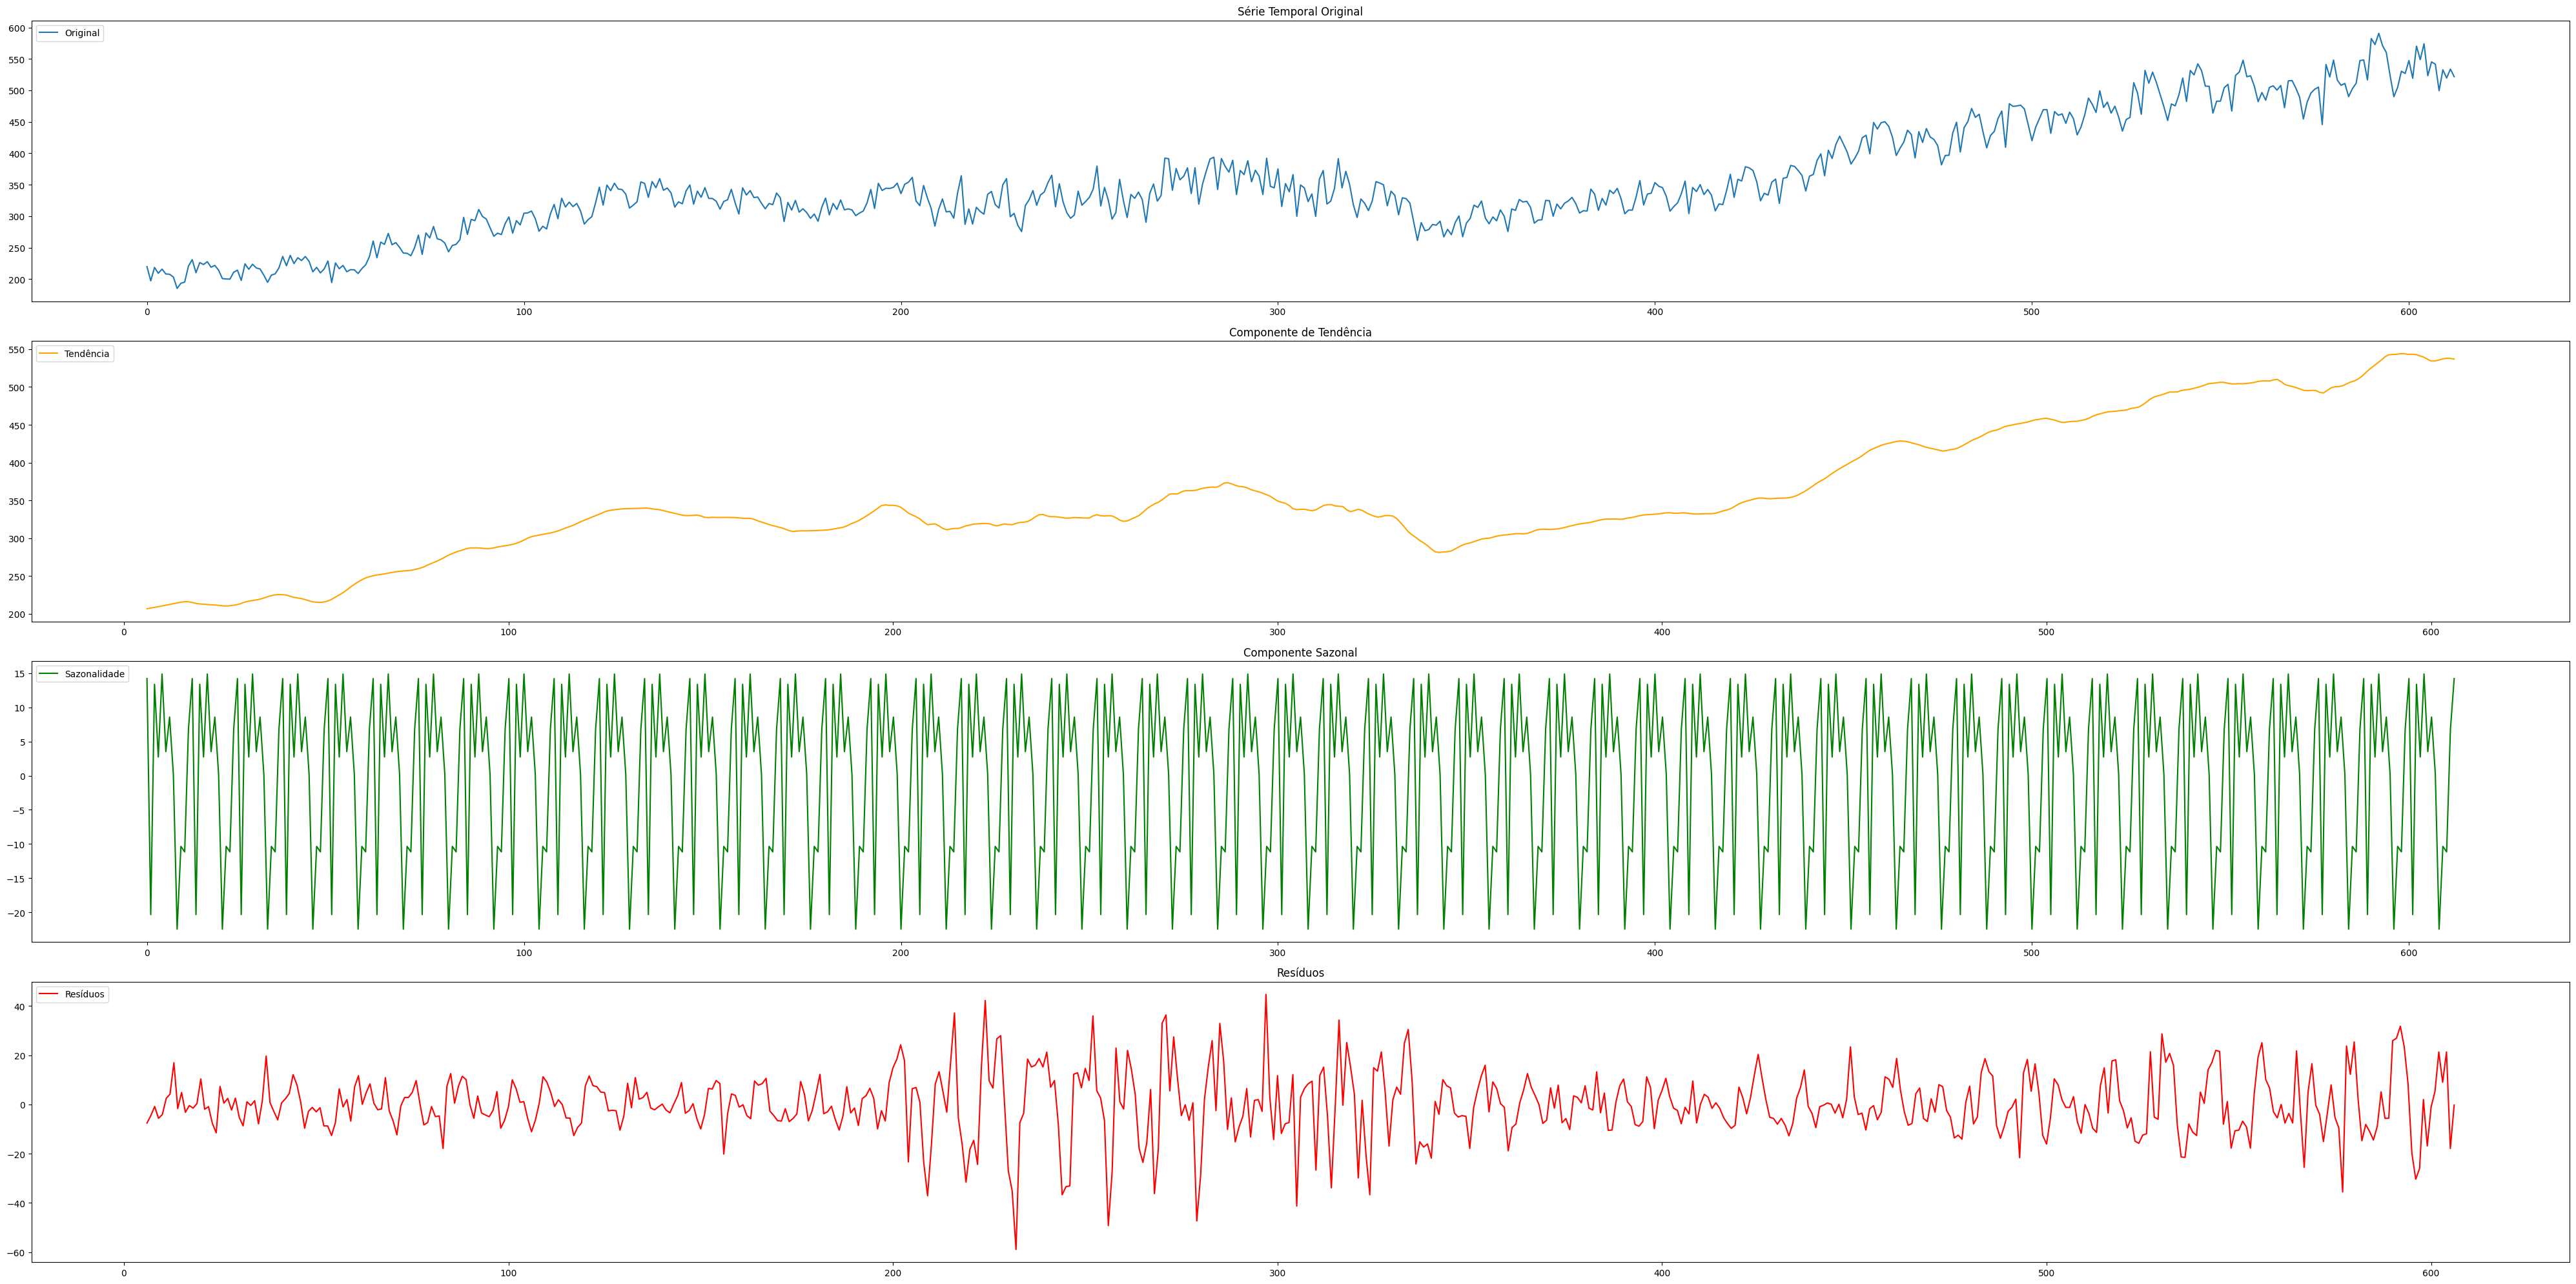

In [9]:
# Decompondo a série temporal
decomposicao = seasonal_decompose(dataFrame_process['Total Renewable Energy'], model='additive', period=12)  # 'period=12' para sazonalidade anual # Talvez mudar sazonalidade?

# Plotando os componentes
plt.figure(figsize=(40, 20))

plt.subplot(411)
plt.plot(dataFrame_process['Total Renewable Energy'], label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()


In [10]:
#Média dos resíduos da série temporal
np.mean(decomposicao.resid)

0.012056736111130473

In [11]:
#Desvio padrão dos resíduos da série temporal
np.std(decomposicao.resid)

12.904094420434747

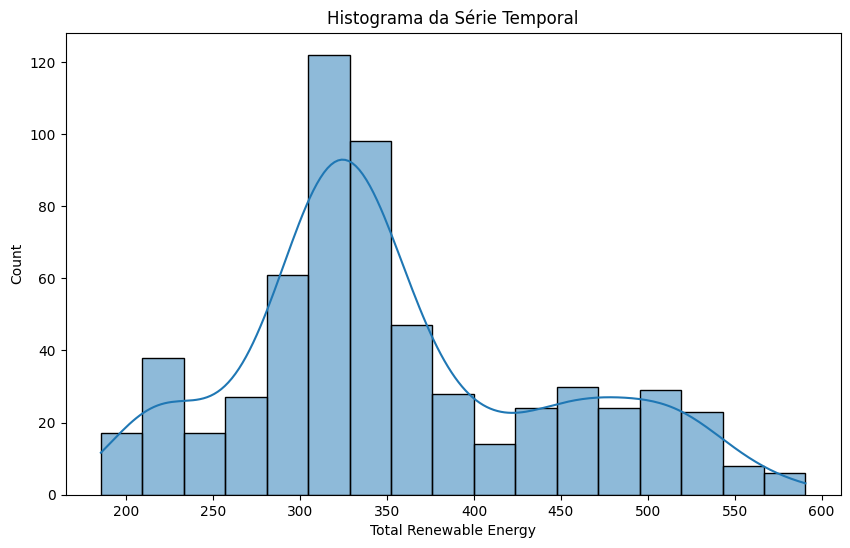

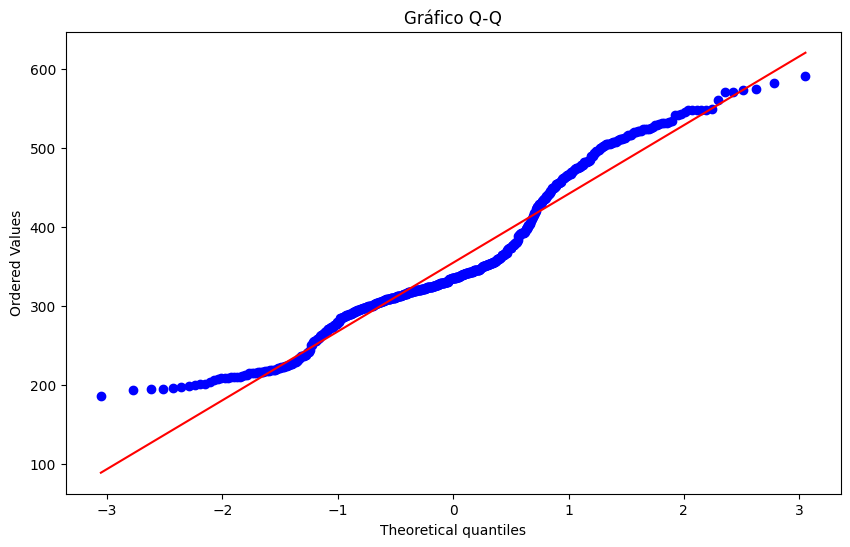

Shapiro-Wilk Teste
Estatística: 0.9481498124206729
Valor-p: 7.851643982381795e-14

Teste de Kolmogorov-Smirnov
Estatística: 1.0
Valor-p: 0.0

Teste de Anderson-Darling
Estatística: 13.02325552539719
Valores Críticos: [0.572 0.652 0.782 0.912 1.085]
Resultado: [15.  10.   5.   2.5  1. ]


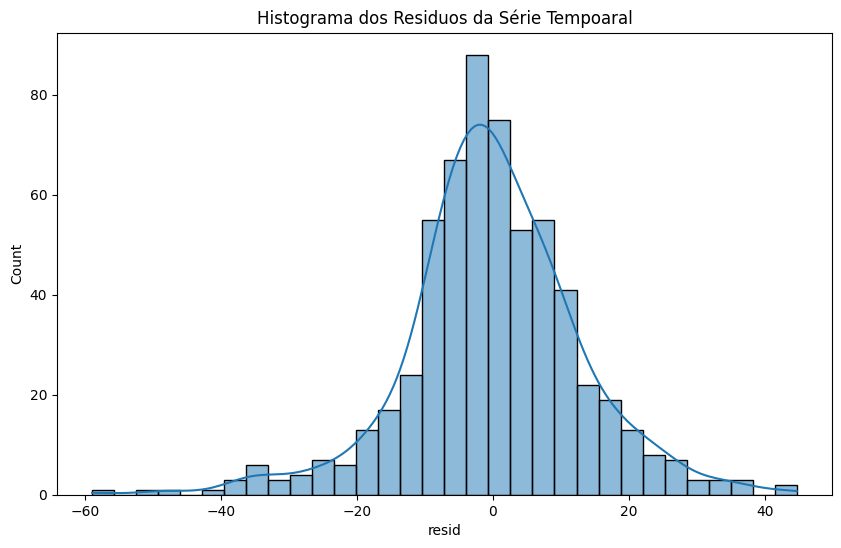

In [12]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(dataFrame_process['Total Renewable Energy'], kde=True)
plt.title('Histograma da Série Temporal')
plt.show()

# Gráfico Q-Q
plt.figure(figsize=(10, 6))
stats.probplot(dataFrame_process['Total Renewable Energy'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

# Teste de Shapiro-Wilk
shapiro_test = stats.shapiro(dataFrame_process['Total Renewable Energy'])
print('Shapiro-Wilk Teste')
print('Estatística:', shapiro_test.statistic)
print('Valor-p:', shapiro_test.pvalue)

# Teste de Kolmogorov-Smirnov
ks_test = stats.kstest(dataFrame_process['Total Renewable Energy'], 'norm')
print('\nTeste de Kolmogorov-Smirnov')
print('Estatística:', ks_test.statistic)
print('Valor-p:', ks_test.pvalue)

# Teste de Anderson-Darling
ad_test = stats.anderson(dataFrame_process['Total Renewable Energy'], dist='norm')
print('\nTeste de Anderson-Darling')
print('Estatística:', ad_test.statistic)
print('Valores Críticos:', ad_test.critical_values)
print('Resultado:', ad_test.significance_level)

# Histograma de resíduos 
plt.figure(figsize=(10, 6))
sns.histplot(decomposicao.resid, kde=True)
plt.title('Histograma dos Residuos da Série Tempoaral')
plt.show()

# Transformação da base de dados

### Diferenciação e Transformação Logarítmica

In [13]:
data = dataFrame_process['Total Renewable Energy']
# Executar o teste ADF na série original
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Transformação Logarítmica
log_data = np.log(data)

# Verificando a série transformada
print(log_data)

ADF Statistic: -0.3476306025138657
p-value: 0.9184822690134047
0      5.392900
1      5.284877
2      5.387641
3      5.343912
4      5.375195
         ...   
608    6.213680
609    6.278075
610    6.253132
611    6.280057
612    6.257210
Name: Total Renewable Energy, Length: 613, dtype: float64


### Grafícos de autocorrelação (ACF e PACF)

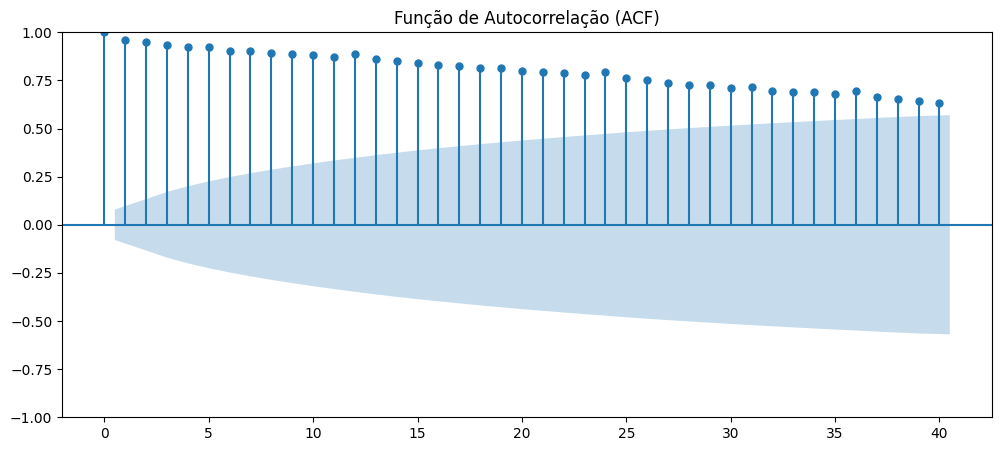

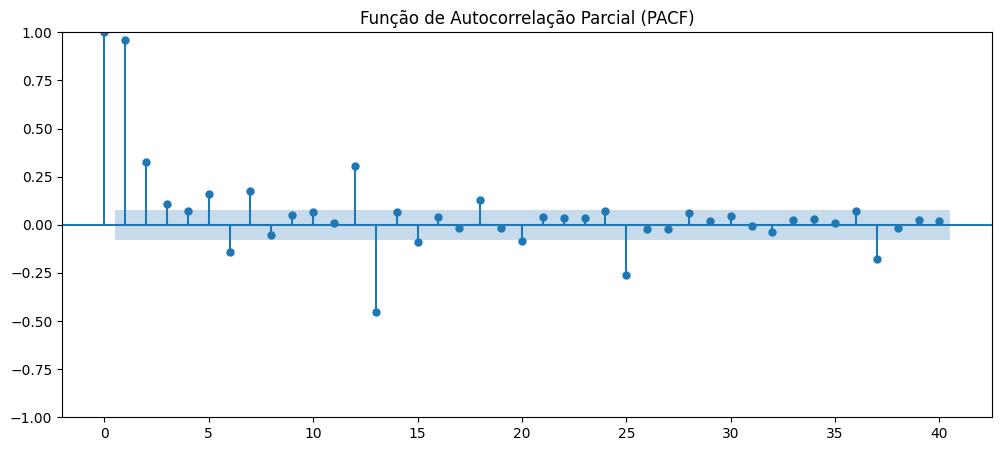

In [14]:
#ACF E PACF antes da transformação dos dados
# Plotar a função de autocorrelação (ACF)
plt.figure(figsize=(12, 5))
plot_acf(log_data, lags=40, ax=plt.gca())
plt.title('Função de Autocorrelação (ACF)')
plt.show()

# Plotar a função de autocorrelação parcial (PACF)
plt.figure(figsize=(12, 5))
plot_pacf(log_data, lags=40, ax=plt.gca())
plt.title('Função de Autocorrelação Parcial (PACF)')
plt.show()

### Aplicação da diferenciação

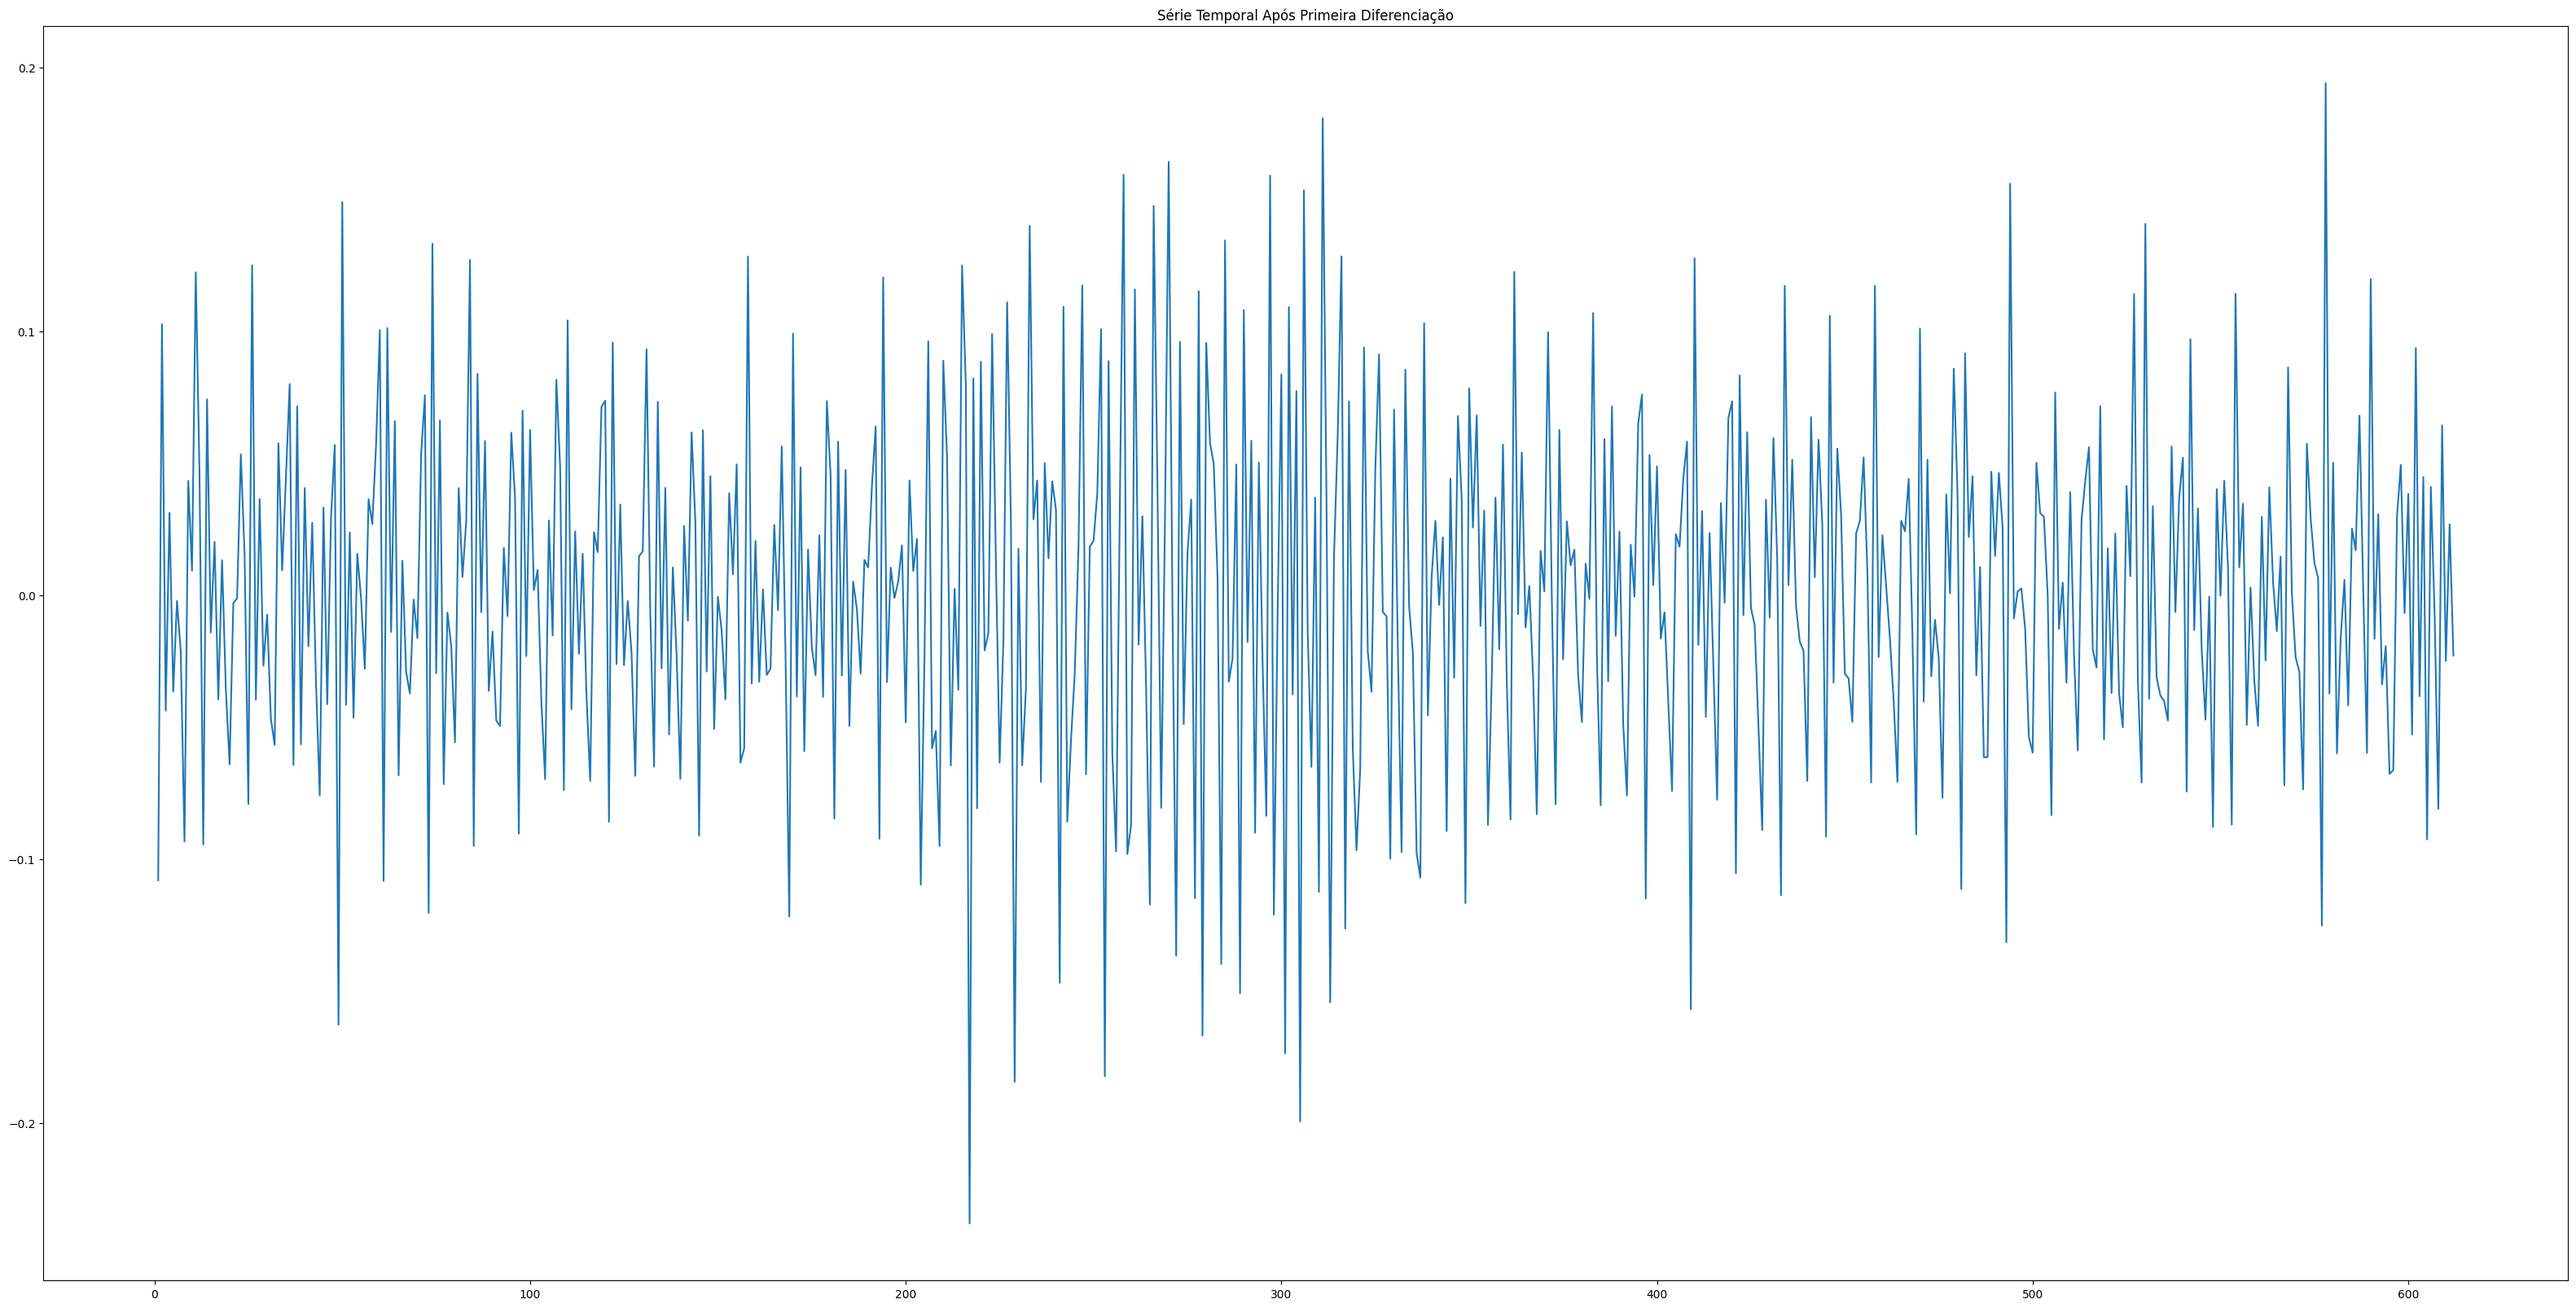

ADF Statistic: -6.850250011870762
p-value: 1.7015061255280695e-09
1     -0.108023
2      0.102764
3     -0.043730
4      0.031283
5     -0.036461
         ...   
608   -0.080959
609    0.064395
610   -0.024942
611    0.026924
612   -0.022847
Name: Total Renewable Energy, Length: 612, dtype: float64


In [15]:
# Aplicar a primeira diferenciação
initial_value = log_data.loc[0]
data_diff1 = log_data.diff().dropna()

# Plotar a série diferenciada
plt.figure(figsize=(40, 20))
plt.plot(data_diff1)
plt.title('Série Temporal Após Primeira Diferenciação')
plt.show()

# Executar o teste ADF na série diferenciada
result_diff1 = adfuller(data_diff1)
print('ADF Statistic:', result_diff1[0])
print('p-value:', result_diff1[1])

print(data_diff1)

data_diff1 = pd.Series(data_diff1)

# Aplicação do modelo SARIMA

In [16]:
from sklearn.metrics import mean_absolute_error

# Configuração da validação cruzada
n_splits = 4
tscv = TimeSeriesSplit(n_splits=n_splits)

# Loop para treinar e validar o modelo em cada divisão
for fold, (train_idx, val_idx) in enumerate(tscv.split(data_diff1), 1):
    train_cross, val = data_diff1.iloc[train_idx], data_diff1.iloc[val_idx]
    
    # Modelo simples: previsão pela média dos dados de treino
    pred = np.mean(train_cross)  
    mae = mean_absolute_error(val, np.full_like(val, pred))  

    print(f"Fold {fold}: {len(train_cross)} treino - {len(val)} validação | MAE: {mae:.4f}")

Fold 1: 124 treino - 122 validação | MAE: 0.0496
Fold 2: 246 treino - 122 validação | MAE: 0.0704
Fold 3: 368 treino - 122 validação | MAE: 0.0451
Fold 4: 490 treino - 122 validação | MAE: 0.0437


### Divisão dos dados para treino e teste

In [17]:
train_size = int(len(data_diff1) * 0.8)  # 80% treino, 20% teste
train, test = data_diff1[:train_size], data_diff1[train_size:]

### Plot dos gráficos de Autocorrelação (ACF E PACF)

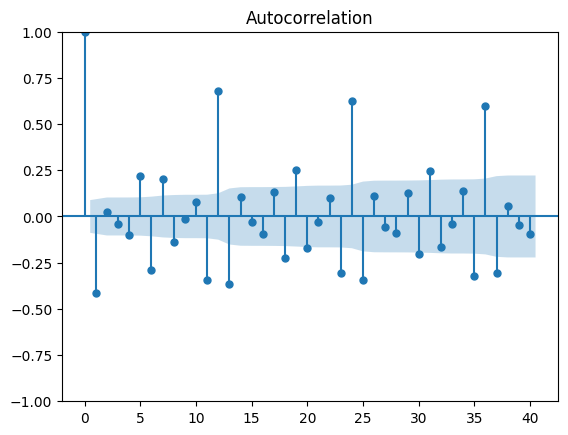

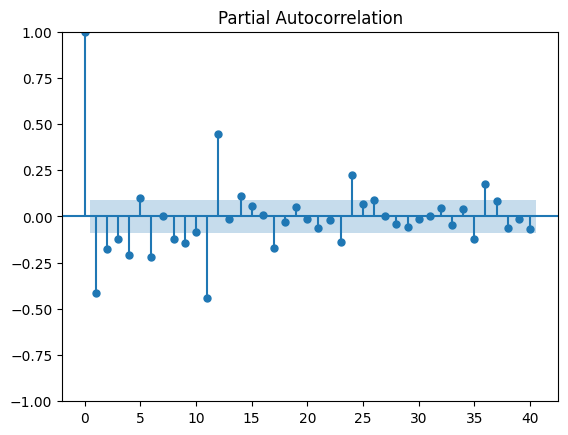

In [18]:
sm.graphics.tsa.plot_acf(train, lags=40)
sm.graphics.tsa.plot_pacf(train, lags=40)
plt.show()

### Aplicação do modelo SARIMA

C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. 

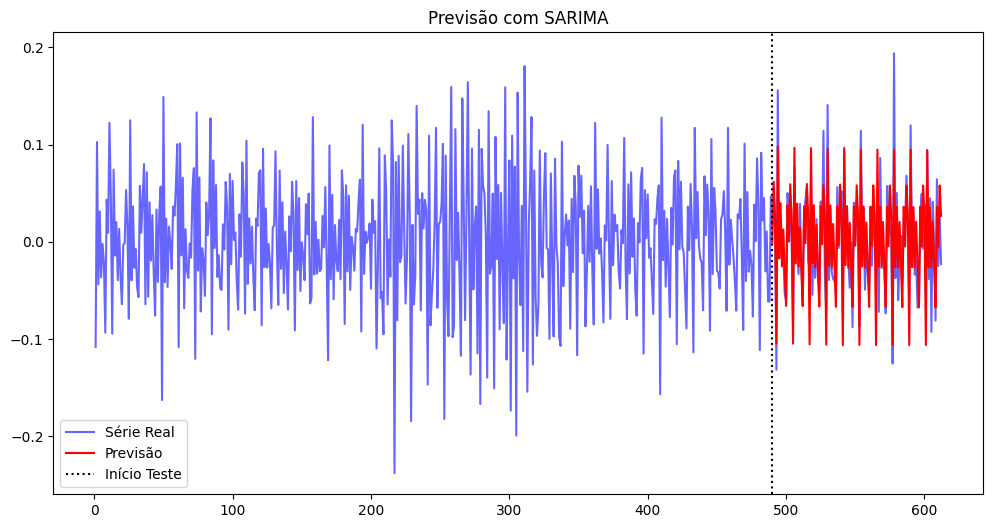

In [19]:
# Criar e treinar o modelo com os dados de treino
model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(6, 1, 2, 12))
result = model.fit()

# Fazer previsões
forecast = result.predict(start=len(train), end=len(data_diff1) - 1, dynamic=False)

plt.figure(figsize=(12, 6))

plt.plot(data_diff1.index, data_diff1, label="Série Real", color='blue', alpha=0.6)
plt.plot(test.index, forecast, label="Previsão", color='red')

plt.axvline(data_diff1.index[train_size], color='black', linestyle="dotted", label="Início Teste")
plt.title("Previsão com SARIMA")
plt.legend()
plt.show()

Desvio Padrão do Ruído: 0.0638
Razão Sinal-Ruído (SNR): 1.0214
Variância das Diferenças Sucessivas: 0.0120


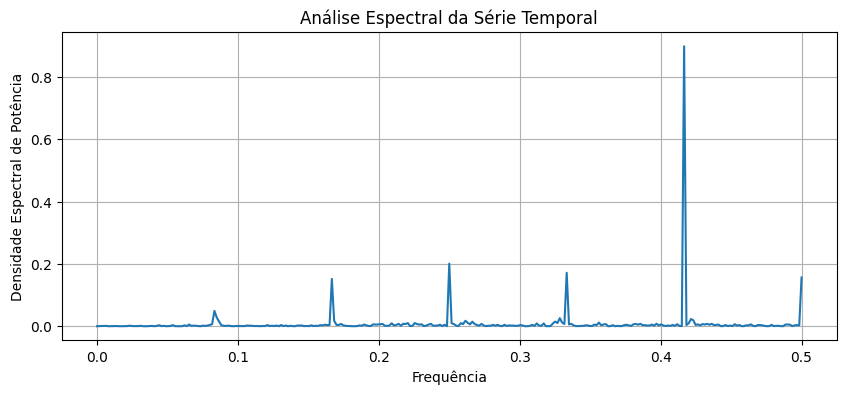

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Supondo que data_diff1 já está definida externamente
serie = np.array(data_diff1)
n = len(serie)

# 1. Cálculo do desvio padrão dos resíduos
media_movel = np.convolve(serie, np.ones(5)/5, mode='valid')
residuos = serie[2:-2] - media_movel  # Ajuste nos índices para alinhar com a média móvel
desvio_padrao_ruido = np.std(residuos)
print(f"Desvio Padrão do Ruído: {desvio_padrao_ruido:.4f}")

# 2. Razão Sinal-Ruído (SNR)
desvio_padrao_sinal = np.std(serie)
SNR = desvio_padrao_sinal / desvio_padrao_ruido
print(f"Razão Sinal-Ruído (SNR): {SNR:.4f}")

# 3. Variância das diferenças sucessivas
variancia_diferencas = np.var(np.diff(serie))
print(f"Variância das Diferenças Sucessivas: {variancia_diferencas:.4f}")

# 4. Análise espectral do ruído
frequencias, espectro = periodogram(serie, scaling='density')
plt.figure(figsize=(10, 4))
plt.plot(frequencias, espectro)
plt.xlabel('Frequência')
plt.ylabel('Densidade Espectral de Potência')
plt.title('Análise Espectral da Série Temporal')
plt.grid()
plt.show()


### Resultados da predição estipulando os paramêtros manualmente

R^2: 0.7664065292709515
RMSE: 21.658824642034407
Similaridade de Cosseno: 0.9993666979749039
MAE: 17.12403604695589
Desvio Padrão (Valores Reais): 44.81305331615975
Desvio Padrão (Valores Preditos): 41.703703228848994


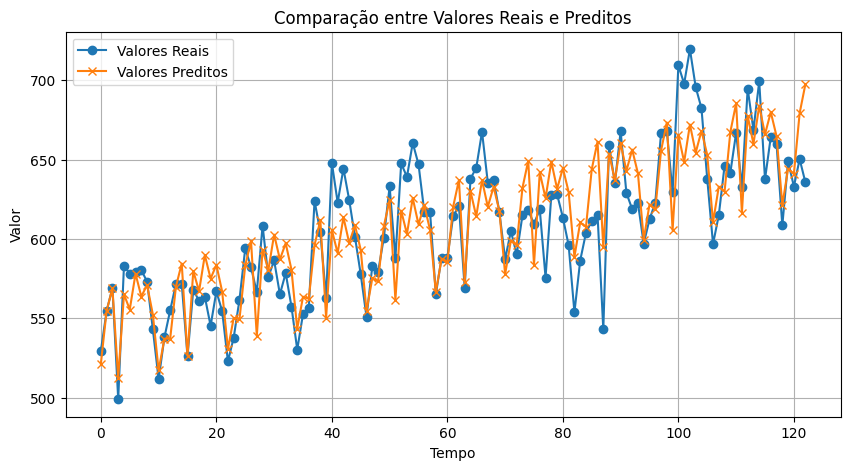

Porcentagem de erro: 2.83%
MAPE: 2.79%
Acurácia (dentro de 5% de tolerância): 83.74%


In [21]:
# Passo 1: Reverter a diferenciação
# Pegando o último valor antes da diferenciação (usando log)
data_log = np.array(log_data)
last_value_log = data_log[-1]

# Passo 3: Reverter a diferenciação nos valores reais e nas previsões
y_true_differenced = np.array(test)  # Valores reais
y_pred_differenced = np.array(forecast)  # Previsões

# Reverter a diferenciação acumulada
y_true_log = [last_value_log]
y_pred_log = [last_value_log]

# Reconstrução da série logaritmica revertida para valores reais
for i in range(len(y_true_differenced)):
    y_true_log.append(y_true_log[-1] + y_true_differenced[i])
    y_pred_log.append(y_pred_log[-1] + y_pred_differenced[i])

# Excluir o primeiro valor, pois já foi incluído no passo anterior
y_true_log = np.array(y_true_log[1:])
y_pred_log = np.array(y_pred_log[1:])

# Passo 4: Reverter a transformação logarítmica da série principal
y_true = np.exp(y_true_log)
y_pred = np.exp(y_pred_log)

# Passo 5: Calcular as métricas
# Calcular R^2
r2 = r2_score(y_true, y_pred)
print(f'R^2: {r2}')

# Calcular RMSE
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
print(f'RMSE: {rmse}')

# Calcular Similaridade de Cosseno
y_true_reshaped = y_true.reshape(1, -1)
y_pred_reshaped = y_pred.reshape(1, -1)
cosine_sim = cosine_similarity(y_true_reshaped, y_pred_reshaped)[0][0]
print(f'Similaridade de Cosseno: {cosine_sim}')

# Calcular MAE (Erro Absoluto Médio)
mae = np.mean(np.abs(y_true - y_pred))
print(f'MAE: {mae}')

# Calcular Desvio Padrão
y_true_std = np.std(y_true)
y_pred_std = np.std(y_pred)
print(f'Desvio Padrão (Valores Reais): {y_true_std}')
print(f'Desvio Padrão (Valores Preditos): {y_pred_std}')

# Passo 6: Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Valores Reais', marker='o')
plt.plot(y_pred, label='Valores Preditos', marker='x')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.grid()
plt.show()

valores_reais = y_true  # Intervalo de valores fornecido

# Cálculo da média dos valores reais
media_valores_reais = sum(y_true) / len(y_true)

# Cálculo da porcentagem de erro
porcentagem_erro = (mae / media_valores_reais) * 100

# Exibição do resultado
print(f"Porcentagem de erro: {porcentagem_erro:.2f}%")


mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f'MAPE: {mape:.2f}%')

# Definir um limiar de tolerância (exemplo: 5% do valor real)
tolerance = 0.05  # 5%

# Calcular a proporção de previsões dentro do limiar
correct_predictions = np.abs(y_true - y_pred) <= (tolerance * np.abs(y_true))
accuracy = np.mean(correct_predictions) * 100  # Em porcentagem

print(f"Acurácia (dentro de {tolerance * 100:.0f}% de tolerância): {accuracy:.2f}%")

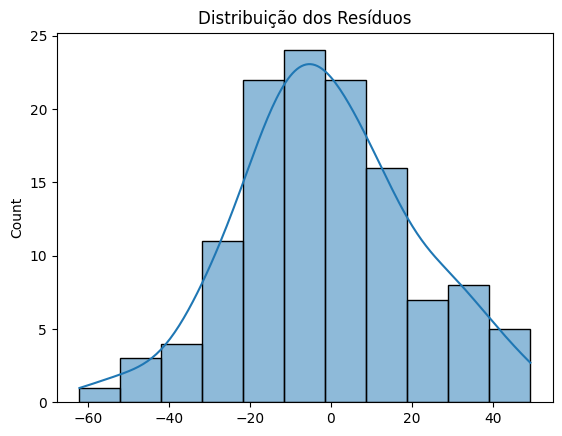

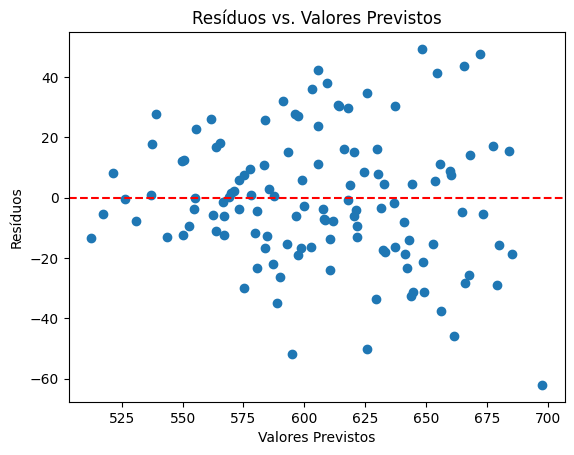

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Suponha que temos y_real (dados reais) e y_pred (previsões)
residuos = y_true - y_pred

# Histograma dos resíduos
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()

# Resíduos vs. valores previstos
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Valores Previstos")
plt.show()


In [23]:
from scipy.stats import shapiro, jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox

# Teste de normalidade de Shapiro-Wilk
shapiro_test = shapiro(residuos)
print("Shapiro-Wilk Test:", shapiro_test)

# Teste de normalidade de Jarque-Bera
jb_test = jarque_bera(residuos)
print("Jarque-Bera Test:", jb_test)

# Teste de Ljung-Box para autocorrelação dos resíduos
ljung_box_test = acorr_ljungbox(residuos, lags=[10], return_df=True)
print("Ljung-Box Test:", ljung_box_test)


Shapiro-Wilk Test: ShapiroResult(statistic=0.9920197850381582, pvalue=0.7073175365803477)
Jarque-Bera Test: SignificanceResult(statistic=0.013245365215149246, pvalue=0.9933991990232065)
Ljung-Box Test:      lb_stat     lb_pvalue
10  70.60272  3.391111e-11


In [24]:
y_pred

array([521.54124312, 554.88244687, 568.91123136, 512.3512645 ,
       565.15829877, 555.56522209, 578.12609945, 563.77062425,
       571.03531879, 552.42199195, 517.19434392, 537.15463244,
       537.24395904, 570.06701618, 584.54777102, 526.41057527,
       579.86767046, 567.11320478, 589.87645647, 575.07828363,
       583.7205158 , 566.8967324 , 530.63904407, 550.31340593,
       549.62245405, 583.35654273, 598.78922081, 538.84913634,
       593.38988197, 580.49803952, 602.80600748, 587.1186071 ,
       597.37219682, 580.74349822, 543.39465075, 563.66393342,
       562.34125008, 596.20581629, 611.85795906, 550.44496901,
       605.66237952, 591.09376587, 613.73512864, 597.52209354,
       608.64742633, 593.07330771, 554.75958654, 575.2888082 ,
       573.31416833, 608.1055406 , 624.6572078 , 561.67020736,
       617.83593606, 603.20964762, 625.83779008, 609.26451304,
       621.315645  , 605.69957765, 566.59396087, 587.61910629,
       585.31133882, 620.38244332, 637.15133955, 573.00

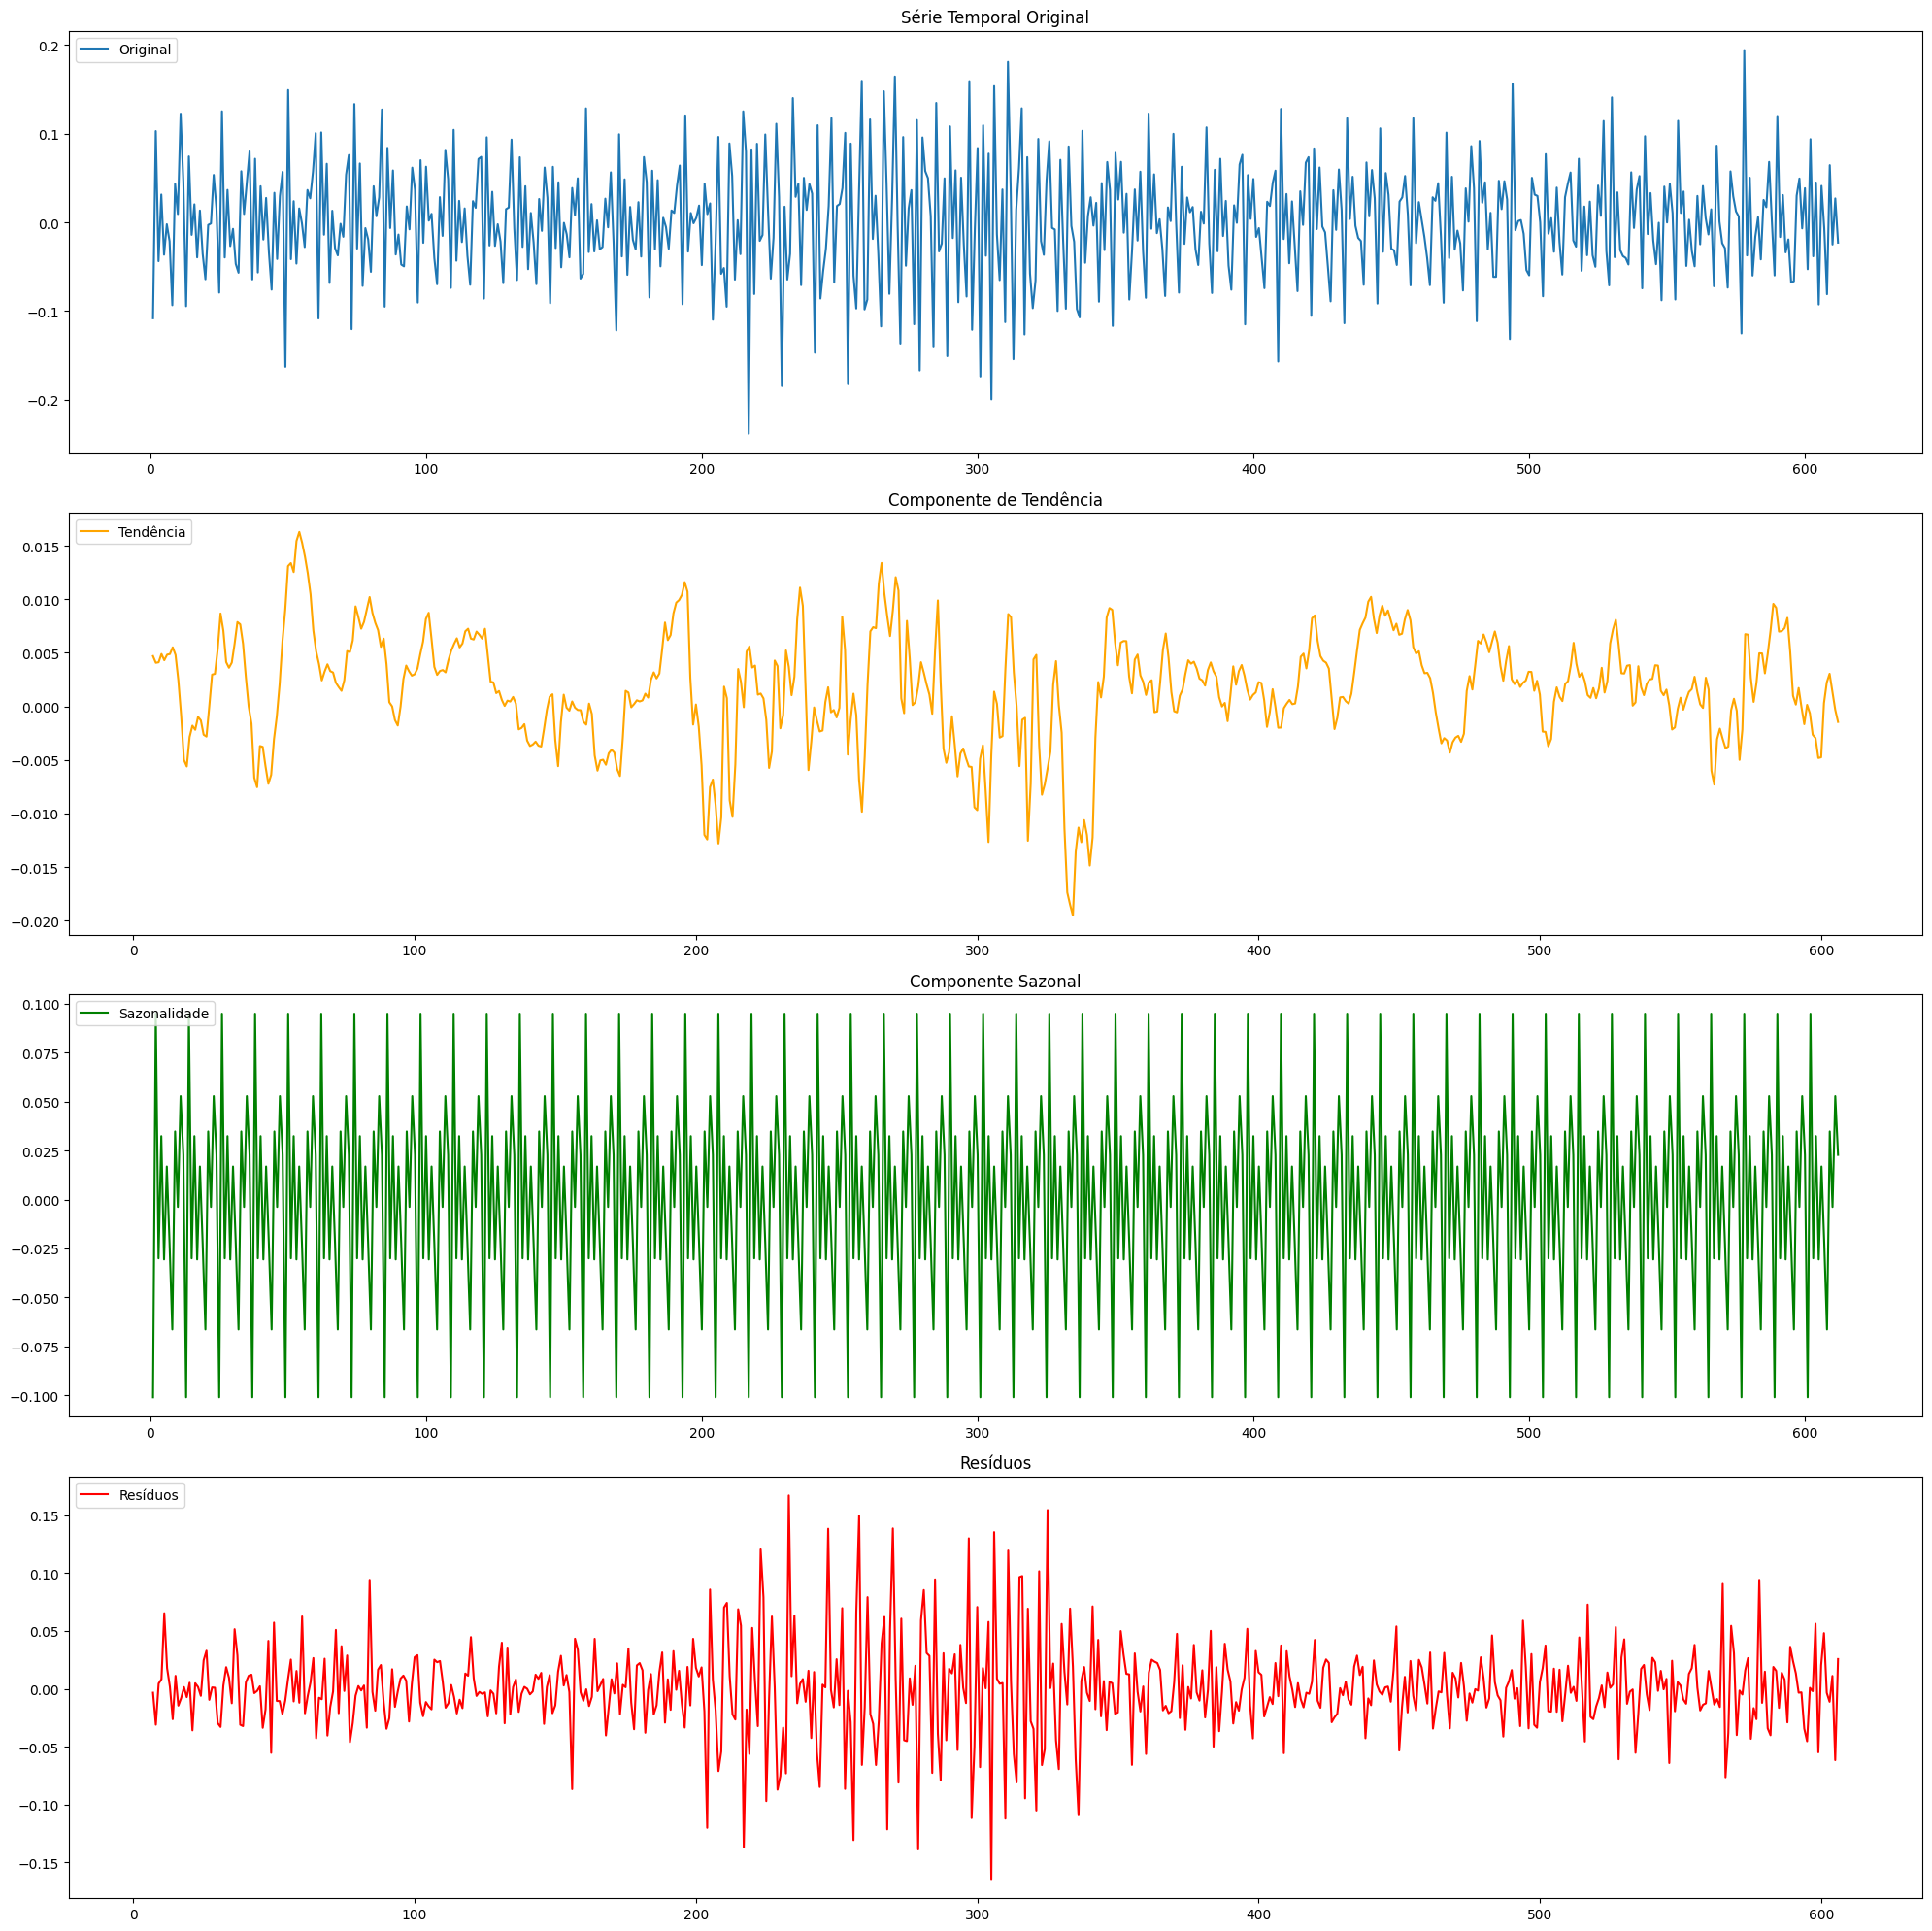

In [25]:

# Decompondo a série temporal
decomposicao = seasonal_decompose(data_diff1, model='additive', period=12)  # 'period=12' para sazonalidade anual

# Plotando os componentes
plt.figure(figsize=(20, 20))

plt.subplot(411)
plt.plot(data_diff1, label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()

### Resultados da predição usando o Auto-ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-1711.890, Time=3.95 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-1247.047, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-1583.481, Time=1.39 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-1500.378, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-1248.847, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-1505.943, Time=3.33 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-1618.964, Time=4.09 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-1708.480, Time=7.15 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-1709.186, Time=6.66 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-1381.799, Time=1.82 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=-1563.199, Time=6.36 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-1674.917, Time=12.81 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=-1716.439, Time=7.29 sec
 ARIMA(1,0,2)(2,0,2)[12] intercept   : AIC=-1718.260, Time=7.72 sec
 ARI

C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


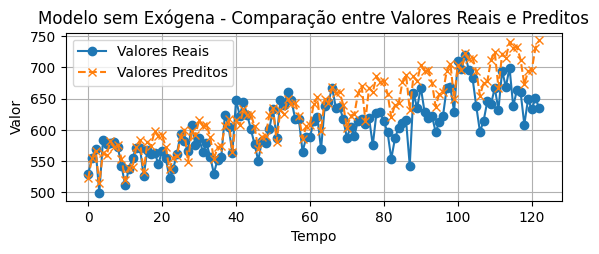

In [26]:
# Divida os dados de treino e teste manualmente
train_size = int(len(data_diff1) * 0.8)  # 80% para treino, 20% para teste
train = data_diff1[:train_size]
test = data_diff1[train_size:]

# Ajuste do modelo SARIMA sem exógena
modelo_sarima_sem_exog = pm.auto_arima(train, 
                                       seasonal=True, m=12, 
                                       trace=True, 
                                       error_action='ignore',
                                       suppress_warnings=True,
                                       stepwise=True)

# Resumo do modelo sem exógena
print("Modelo sem exógena:")
print(modelo_sarima_sem_exog.summary())

# Faça previsões sem a variável exógena
previsoes_sarima_sem_exog = modelo_sarima_sem_exog.predict(n_periods=len(test))

# Reverter a diferenciação e a transformação logarítmica para o modelo sem exógena
data_log = np.array(log_data)
last_value_log = data_log[-1]

y_true_differenced = np.array(test)
y_pred_differenced = np.array(previsoes_sarima_sem_exog)

y_true_log = [last_value_log]
y_pred_log = [last_value_log]

for i in range(len(y_true_differenced)):
    y_true_log.append(y_true_log[-1] + y_true_differenced[i])
    y_pred_log.append(y_pred_log[-1] + y_pred_differenced[i])

y_true_log = np.array(y_true_log[1:])
y_pred_log = np.array(y_pred_log[1:])

# Reverter a transformação logarítmica
y_true = np.exp(y_true_log)
y_pred = np.exp(y_pred_log)

# Calcular as métricas para o modelo sem exógena
r2_sem_exog = r2_score(y_true, y_pred)
rmse_sem_exog = np.sqrt(mean_squared_error(y_true, y_pred))
cosine_sim_sem_exog = cosine_similarity(y_true.reshape(1, -1), y_pred.reshape(1, -1))[0][0]
y_true_std_sem_exog = np.std(y_true)
y_pred_std_sem_exog = np.std(y_pred)

print(f'\nModelo sem exógena:')
print(f'R²: {r2_sem_exog}')
print(f'RMSE: {rmse_sem_exog}')
print(f'Similaridade de Cosseno: {cosine_sim_sem_exog}')
print(f'Desvio Padrão (Valores Reais): {y_true_std_sem_exog}')
print(f'Desvio Padrão (Valores Preditos): {y_pred_std_sem_exog}')

# Gráfico para o modelo sem exógena
plt.subplot(2, 1, 1)
plt.plot(y_true, label='Valores Reais', linestyle='-', marker='o')
plt.plot(y_pred, label='Valores Preditos', linestyle='--', marker='x')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Modelo sem Exógena - Comparação entre Valores Reais e Preditos')
plt.legend()
plt.grid()

In [27]:

y_true

array([529.5897724 , 554.72322629, 569.19293215, 499.04586438,
       583.30811376, 578.19005076, 579.00996421, 580.49506747,
       573.12681109, 543.12626325, 511.67350615, 538.00576365,
       555.04241994, 571.79033999, 571.82323399, 526.11519119,
       568.14885217, 560.95846706, 563.65699349, 545.28995758,
       567.0328927 , 554.58068562, 522.91229006, 537.93266587,
       561.73574013, 594.16678921, 582.15316882, 566.4310543 ,
       608.47446165, 576.13722139, 586.49395874, 565.16524438,
       578.51899078, 557.48023095, 530.28054644, 552.73009345,
       556.75778121, 624.09302098, 604.26890262, 562.85657278,
       647.92655265, 623.01239211, 644.40567617, 624.61567012,
       601.31818884, 577.67227481, 550.88559276, 582.83906967,
       579.15372318, 600.97219267, 633.13643485, 587.76829674,
       647.65121767, 639.16578353, 660.56272249, 647.12247705,
       617.33269448, 617.02081061, 565.15062483, 588.35064239,
       588.23612254, 614.32472077, 620.8060574 , 569.13

### Divisão dos dados para predição com o uso de redes neurais

In [28]:
import numpy as np
import tensorflow as tf
import random
import os

# Definir a semente para reprodução dos resultados
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)


In [29]:
df = dataFrame_process['Total Renewable Energy']

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]


print(train_df)
print(val_df)
print(test_df)

train_df = pd.DataFrame(train_df)
val_df = pd.DataFrame(val_df)
test_df = pd.DataFrame(test_df)

train_df

0      219.840
1      197.330
2      218.687
3      209.330
4      215.982
        ...   
424    378.684
425    376.883
426    372.650
427    354.730
428    324.524
Name: Total Renewable Energy, Length: 429, dtype: float64
429    336.481
430    333.639
431    354.116
432    358.983
433    320.408
        ...   
546    506.718
547    506.462
548    463.886
549    482.929
550    482.835
Name: Total Renewable Energy, Length: 122, dtype: float64
551    504.249
552    509.569
553    467.153
554    523.732
555    529.297
        ...   
608    499.536
609    532.762
610    519.638
611    533.819
612    521.761
Name: Total Renewable Energy, Length: 62, dtype: float64


,Total Renewable Energy
0,219.840
1,197.330
2,218.687
3,209.330
4,215.982
...,...
424,378.684
425,376.883
426,372.650
427,354.730


In [30]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [31]:
from sklearn.preprocessing import StandardScaler

# 1. Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df)  # Apenas treino
X_val_scaled = scaler.transform(val_df)
X_test_scaled = scaler.transform(test_df)

# Converta para DataFrame (opcional, mas recomendado para manter rótulos)
train_scaled_df = pd.DataFrame(X_train_scaled, columns=train_df.columns)
val_scaled_df = pd.DataFrame(X_val_scaled, columns=val_df.columns)
test_scaled_df = pd.DataFrame(X_test_scaled, columns=test_df.columns)

# 2. Geração de janelas
window = WindowGenerator(
    input_width = 24,
    label_width= 12,
    shift= 12,
    train_df=train_scaled_df,  # Dados já padronizados
    val_df=val_scaled_df,
    test_df=test_scaled_df,
    label_columns = ["Total Renewable Energy"]
)

window

Total window size: 36
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35]
Label column name(s): ['Total Renewable Energy']

In [32]:
import tensorflow as tf

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [33]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:window.total_window_size]),
                           np.array(train_df[100:100+window.total_window_size]),
                           np.array(train_df[200:200+window.total_window_size])])

example_inputs, example_labels = window.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 36, 1)
Inputs shape: (3, 24, 1)
Labels shape: (3, 12, 1)


In [34]:
window.example = example_inputs, example_labels

def plot(self, model=None, plot_col='Total Renewable Energy', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Data Time')

WindowGenerator.plot = plot

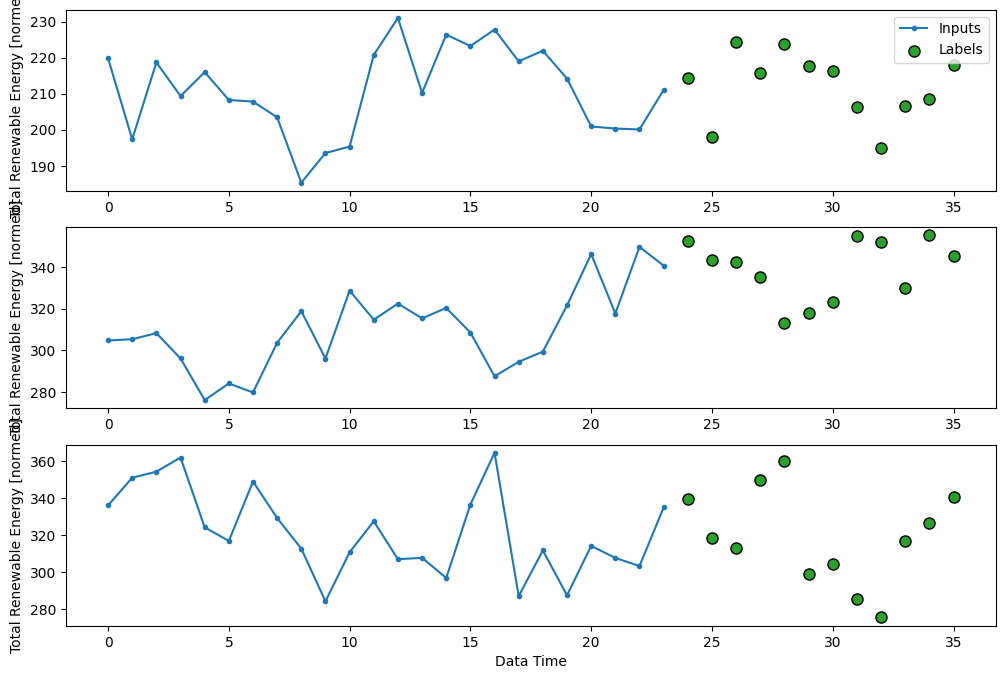

In [35]:
window.plot()

In [36]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [37]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [38]:
# Each element is an (inputs, label) pair.
window.train.element_spec

(TensorSpec(shape=(None, 24, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 12, 1), dtype=tf.float32, name=None))

In [39]:
for example_inputs, example_labels in window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 1)
Labels shape (batch, time, features): (32, 12, 1)


In [40]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Total Renewable Energy'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Total Renewable Energy']

In [41]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 1)
Labels shape (batch, time, features): (32, 1, 1)


In [42]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [43]:
baseline = Baseline(label_index=window.column_indices['Total Renewable Energy'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 598.5013 - mean_absolute_error: 19.4966  


In [44]:
wide_window = WindowGenerator(
    input_width=36, label_width=36, shift=1,
    label_columns=['Total Renewable Energy'])

wide_window

Total window size: 37
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]
Label column name(s): ['Total Renewable Energy']

In [45]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 36, 1)
Output shape: (32, 36, 1)


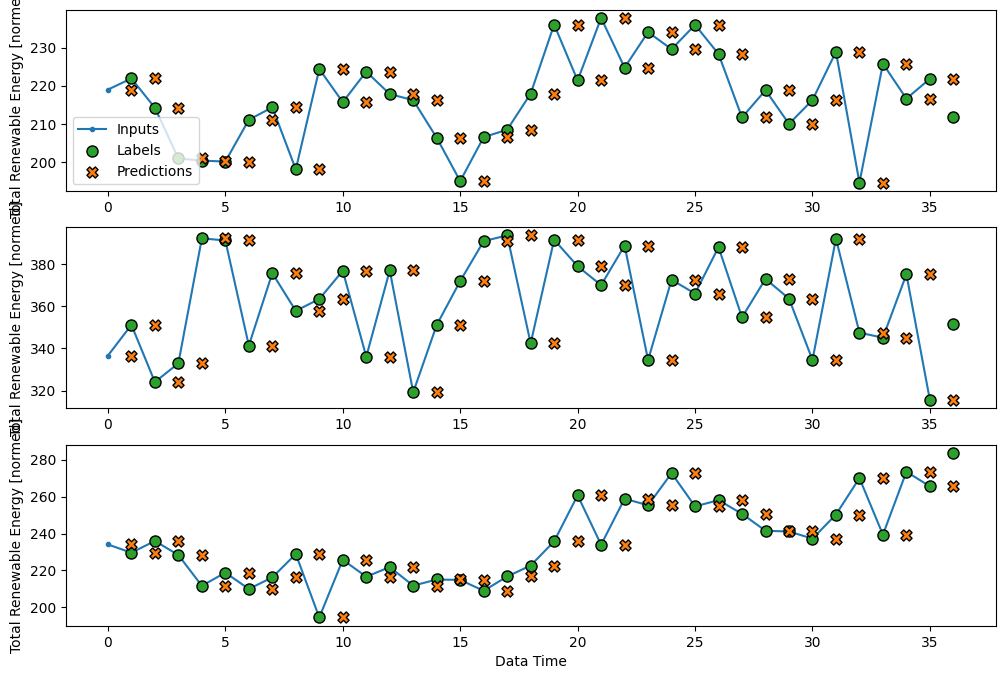

In [46]:
wide_window.plot(baseline)

In [47]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [48]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 1)
Output shape: (32, 1, 1)


In [49]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      )
  return history

In [50]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5744.3198 - mean_absolute_error: 71.1516 - val_loss: 10557.7109 - val_mean_absolute_error: 98.5903
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5621.7349 - mean_absolute_error: 69.8881 - val_loss: 9378.9072 - val_mean_absolute_error: 92.5406
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4797.7124 - mean_absolute_error: 63.9342 - val_loss: 8303.2461 - val_mean_absolute_error: 86.6555
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4236.4536 - mean_absolute_error: 59.9176 - val_loss: 7328.9712 - val_mean_absolute_error: 80.9601
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4010.9526 - mean_absolute_error: 58.1941 - val_loss: 6446.4429 - val_mean_absolute_error: 75.4344
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3403.5781 - mean_absolute_error: 52.4242 - val_loss: 5659.4102 - val_mean_absolute_error: 70.1895
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3072

In [51]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 36, 1)
Output shape: (32, 36, 1)


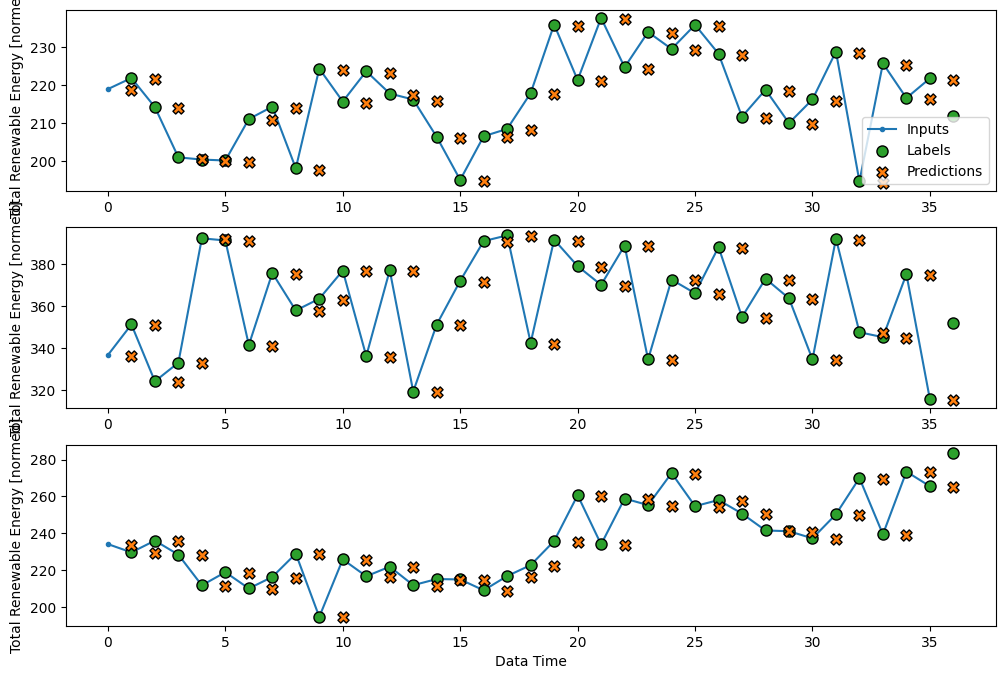

In [52]:
wide_window.plot(linear)

In [53]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 53920.1289 - mean_absolute_error: 227.3994 - val_loss: 37488.0742 - val_mean_absolute_error: 191.7597
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12303.4492 - mean_absolute_error: 105.4202 - val_loss: 2601.6858 - val_mean_absolute_error: 45.7462
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 876.7310 - mean_absolute_error: 23.5765 - val_loss: 1206.4152 - val_mean_absolute_error: 28.8069
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 772.0164 - mean_absolute_error: 21.8194 - val_loss: 580.6696 - val_mean_absolute_error: 19.4651
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 490.8026 - mean_absolute_error: 17.3074 - val_loss: 669.8637 - val_mean_absolute_error: 20.4564
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 471.9329 - mean_absolute_error: 16.9326 - val_loss: 585.3557 - val_mean_absolute_error: 19.5738
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 458.24

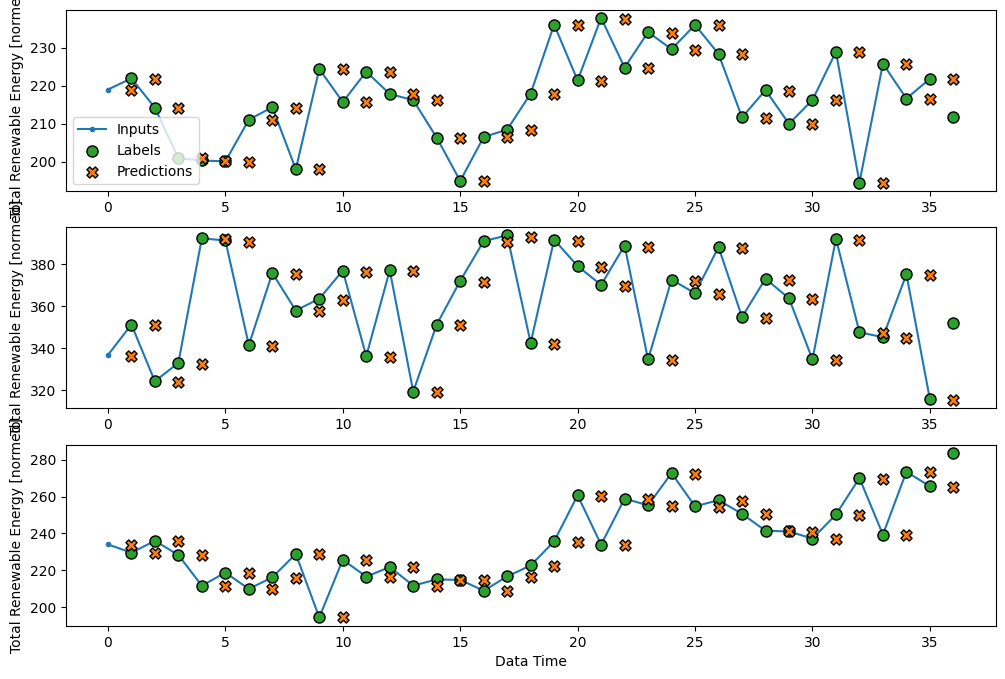

In [54]:
wide_window.plot(dense)

In [55]:
CONV_WIDTH = 12
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Total Renewable Energy'])

conv_window

Total window size: 13
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [12]
Label column name(s): ['Total Renewable Energy']

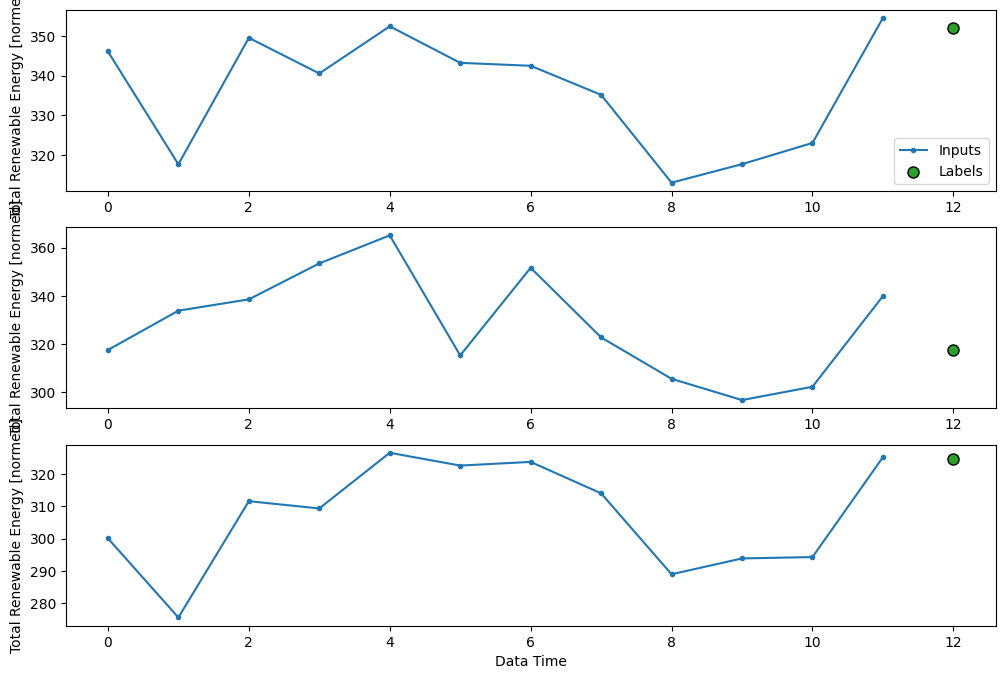

In [56]:
conv_window.plot()

In [57]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [58]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 12, 1)
Output shape: (32, 1, 1)


In [59]:
import IPython
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 339.4024 - mean_absolute_error: 15.2202 


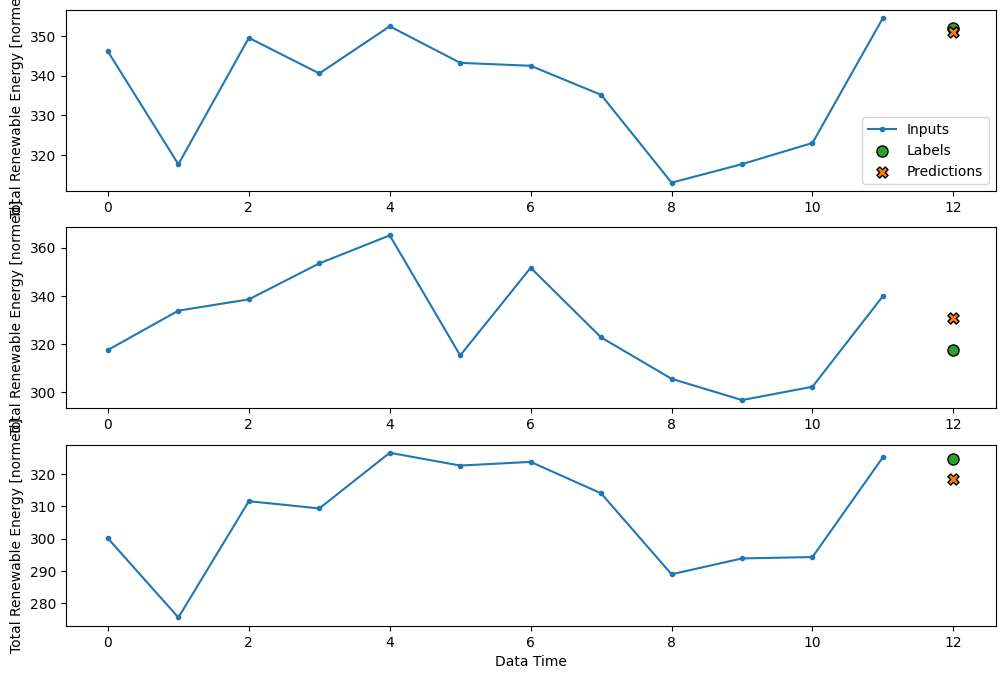

In [60]:
conv_window.plot(multi_step_dense)

In [61]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 36, 1)

ValueError:Exception encountered when calling Sequential.call().

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 12, but received input with shape (32, 36)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 36, 1), dtype=float32)
  • training=None
  • mask=None


In [62]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [63]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 12, 1)
Output shape: (32, 1, 1)


In [64]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 590.5526 - mean_absolute_error: 20.2538 


In [65]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 36, 1)
Labels shape: (32, 36, 1)
Output shape: (32, 25, 1)


In [66]:
LABEL_WIDTH = 12
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Total Renewable Energy'])

wide_conv_window

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): ['Total Renewable Energy']

In [67]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 23, 1)
Labels shape: (32, 12, 1)
Output shape: (32, 12, 1)


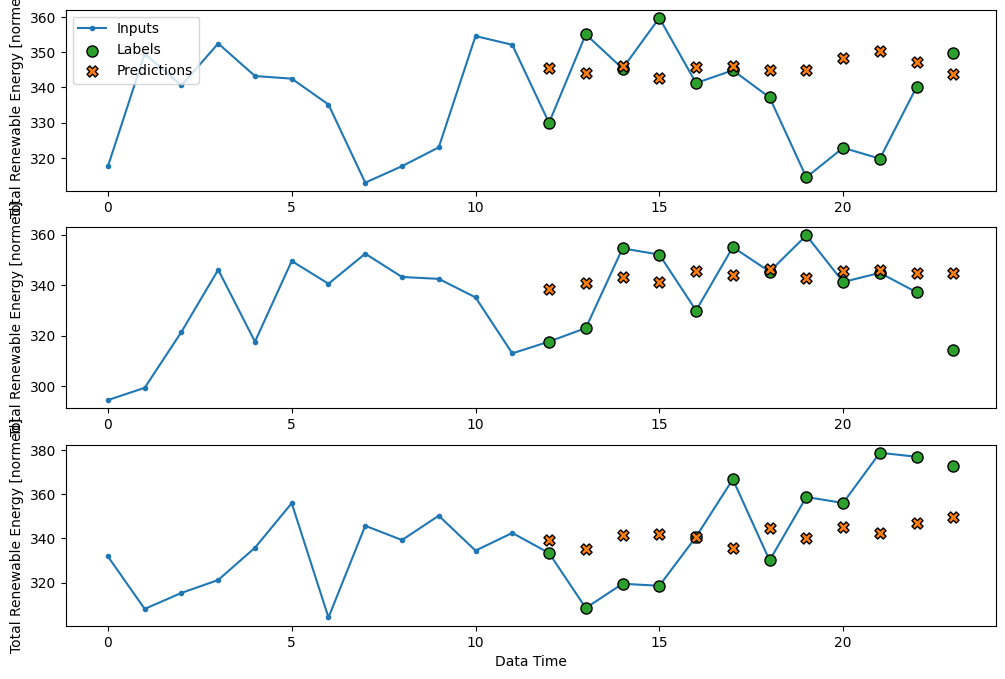

In [68]:
wide_conv_window.plot(conv_model)